# Detection and tracking of moving objects using background segmentation

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


1- Import opencv, numpy and sys packages.


In [2]:
import sys
import numpy as np
import cv2

2- Download video ['M6 Motorway Traffic.mp4'](https://drive.google.com/open?id=12zl9h21HC9Cf6ntjmla9xz_Rt2RV7eZM) and load it using opencv.


In [3]:
path = '/content/drive/My Drive/AI/Image_car/M6 Motorway Traffic.mp4'
#cv2.ocl.setUseOpenCL(False)
opencv_ver = cv2.__version__.split('.')[0]
cap = cv2.VideoCapture(path)# use VideoCapture from cv2 to read the video file

3- Background segmentation using OpenCV function (see workshop on Computer Vision). Do not forget to check OpenCV version in order to use the appropriate functions. 

In [4]:
bg = cv2.createBackgroundSubtractorMOG2()# compute background segmentation using OpenCV

5- Apply background segmentation on this frame using the <code>bg</code> object defined in 3.

In [5]:
from google.colab.patches import cv2_imshow

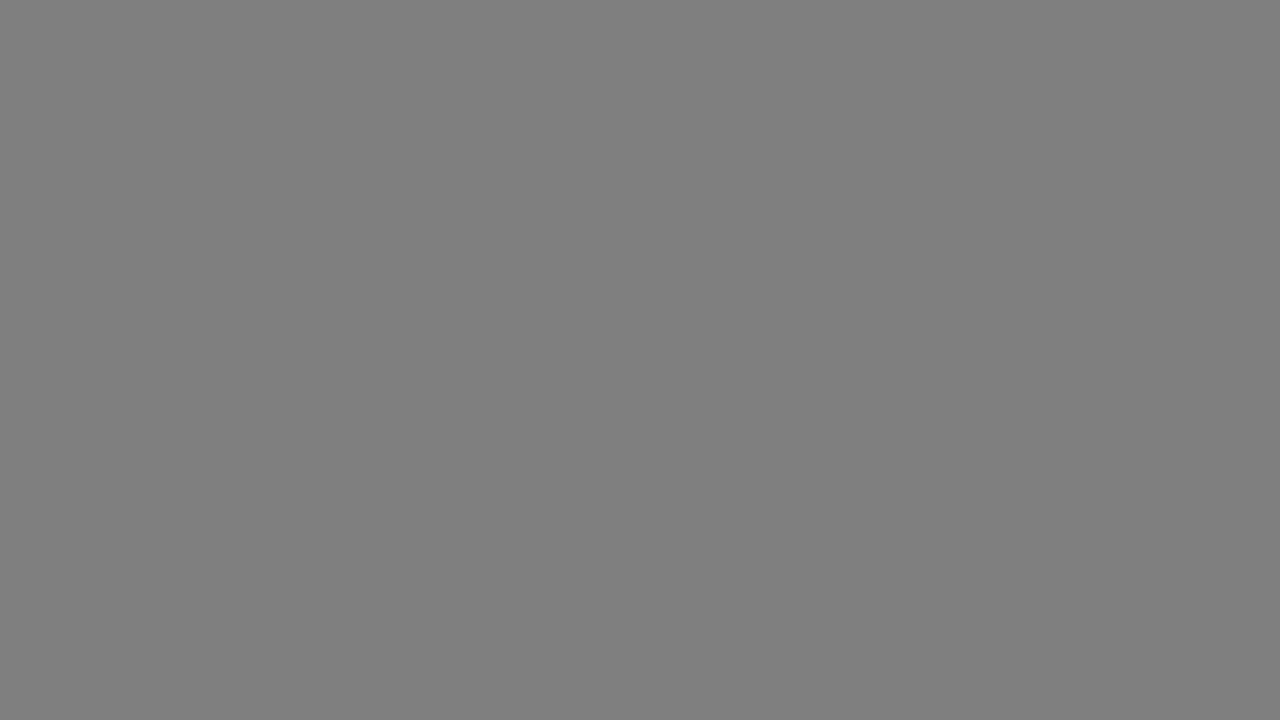

In [6]:

i_frame = 22
cap = cv2.VideoCapture(path)

cap.set(cv2.CAP_PROP_POS_FRAMES, i_frame)

ret, frame = cap.read(i_frame) 

bgmask = bg.apply(frame) 

cv2_imshow(bgmask)

6- Find contours on the background mask to detect the different cars. Use OpenCV and do not forget to check OpenCV version in order to use the appropriate functions.

In [7]:
(contours, hierarchy) = cv2.findContours(bgmask, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[-2:] 

7- Looping through the contours, get bounding boxes from countours and then draw bounding boxes. <br>


In [8]:
valid =[]
for i,contour in enumerate(contours):
  c_area = cv2.contourArea(contour)
  #print(c_area)
  if c_area >= 800:
    #print(contour)
    valid.append(contour)

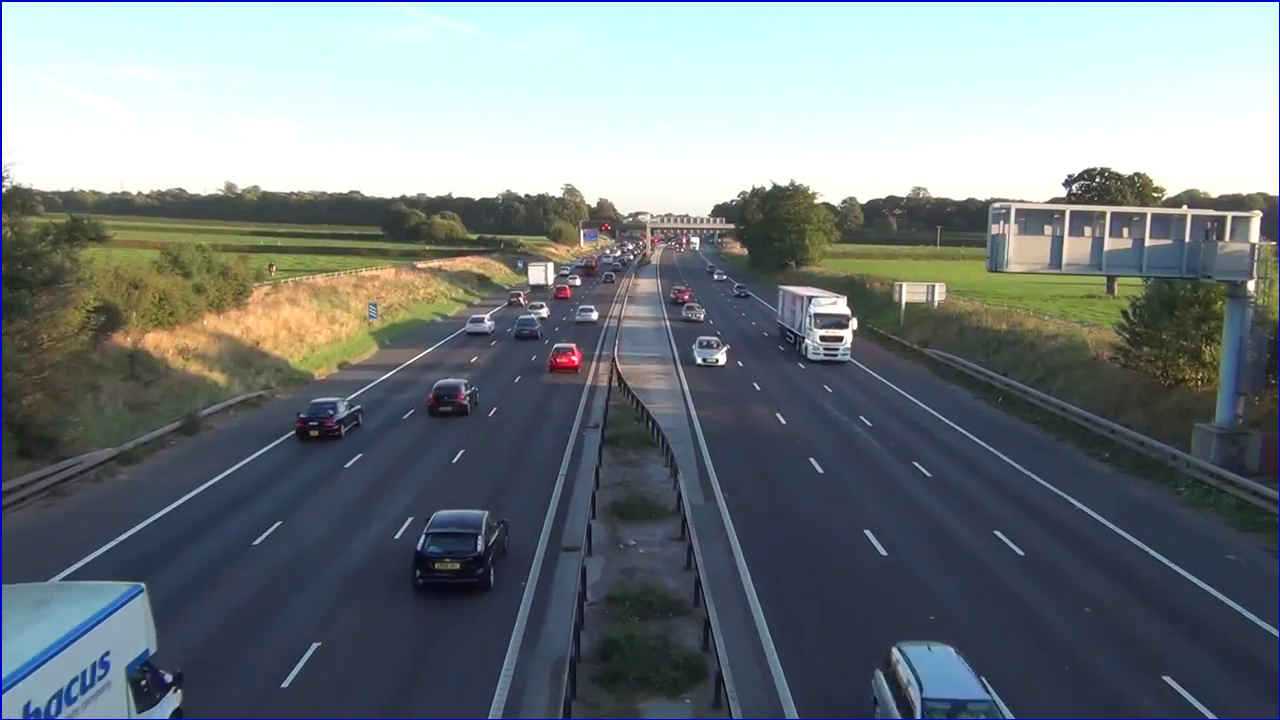

In [9]:
idx =0 
for cnt in valid:
    idx += 1
    x,y,w,h = cv2.boundingRect(cnt)
    roi=frame[y:y+h,x:x+w]
    cv2.imwrite(str(idx) + '.jpg', roi)
    cv2.rectangle(frame,(x,y),(x+w,y+h),(200,0,0),2)
cv2_imshow(frame)

8- Display the result from 7. Don't forget to <code>release</code> the material in the end of the processing.


9- Between 5 and 8, a pipeline has been built to add bounding boxes on moving object in one frame. This can be adapted in a loop to add the bounding boxes for every frame and <code>write</code> it in an <code>output</code> video.

In [10]:
cap = cv2.VideoCapture(path)

frame_width = int(cap.get(3))
frame_height = int(cap.get(4))

#Create a Writer with good dimensions/colors to write the output video
output = cv2.VideoWriter('output.mp4',cv2.VideoWriter_fourcc('M','J','P','G'), 10, (frame_width,frame_height))

# TO DO : Run the pipeline (q5-q8) on each frame (use loop from q4) and write the result in out

cap.release()
output.release()

10 - From here I could go further and develop a detection and tracking algorithm with deep learning. I could use object segmentation relying on the resnet101 Mask RCNN network implemented by tensorflow.